# Проект. Исследование стартапов
- Автор: Шамсуллин Радмир Ильшатович
- Дата: 23.10.2025

## Введение

Финансовая компания, работающая с венчурными инвестициями, хочет понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний. Необходимо исследовать динамику и структуру финансирования стартапов и ответить на вопросы, важные для оценки инвестиционных стратегий.

Задачи:
- Провести предобработку данных, убрать дубликаты и пропуски, проверить корректность числовых и временных значений.
- Выделить группы компаний по срокам финансирования и сравнить их по количеству и объёму инвестиций.
- Классифицировать сегменты рынка на массовые, средние и нишевые и учесть это в дальнейшем анализе.
- Определить типичные и аномальные значения объёмов финансирования, исключить выбросы и ограничить период исследования.
- Сравнить популярность и объёмы разных типов финансирования.
- Проанализировать динамику раундов и объёмов инвестиций по годам, а также изменения в массовых сегментах рынка.
- Рассчитать долю возврата средств для разных типов финансирования и оценить её устойчивость.
- Подвести итоговые выводы и дать рекомендации.

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.


### 1.1. Вывод общей информации

Загрузим необходимые для работы библиотеки.

In [1]:
# Импортируем библиотеки
import pandas as pd

import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
%pip install phik
from phik import phik_matrix

     |████████████████████████████████| 677 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Загрузим все данные по проекту.

In [2]:
investments_df = pd.read_csv("...", sep=';', low_memory=False)
returns_df = pd.read_csv("...")

Познакомимся с данными датасета `cb_investments.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки основного датафрейма на экран
investments_df.head(10)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Xavier University,http://www.xavier.edu/,NaN,NaN,"1,90,00,000",operating,USA,OH,Cincinnati,Cincinnati,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Tulane University,http://tulane.edu/,|Education|,Education,"1,20,00,000",operating,USA,LA,New Orleans,New Orleans,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Duke University,http://www.duke.edu,|Education|,Education,"87,00,000",operating,USA,NC,Raleigh,Durham,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Virginia Commonwealth University, Richmond",http://www.vcu.edu/,NaN,NaN,"60,00,000",operating,USA,VA,Richmond,Richmond,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,WeGame,http://www.WeGame.com,|Social Media|,Social Media,"35,00,000",acquired,USA,CA,SF Bay Area,San Francisco,...,0.0,0.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [5]:
initial_row_count = investments_df.shape[0]
print(initial_row_count)

54294


Датасет `cb_investments.csv` содержит 40 столбцов и 54294 строк, в которых представлена информация о компаниях и состоявшемся финансировании.

Аналогично познакомимся с данными датасета `cb_returns.csv`.

In [6]:
# Выводим первые строки дополнительного датафрейма на экран
returns_df.head(10)

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.00,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.00
1,2001,2.88,23.49,0.00,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.00
2,2002,6.59,209.42,0.00,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.00
3,2003,7.74,233.86,0.00,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.00
4,2004,9.93,555.90,0.00,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.00
5,2005,26.60,2628.92,0.00,9.51,0.02,35.09,31.06,0.0,2.40,3.51,0.0,0.05,0.00
6,2006,61.81,3100.18,0.19,46.74,1.78,113.21,47.75,0.0,16.67,20.58,0.0,0.12,0.00
7,2007,70.41,3585.37,0.01,55.37,3.22,125.68,164.51,0.0,88.81,24.36,0.0,0.57,0.00
8,2008,89.72,2717.02,0.03,41.02,1.71,397.54,102.83,0.0,130.38,84.28,0.0,0.47,0.00
9,2009,160.21,2501.29,0.18,37.50,2.25,394.10,97.21,0.0,203.70,76.76,0.0,0.12,0.02


In [7]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


Датасет `cb_returns.csv` содержит 14 столбцов и 15 строк, в которых представлена информация об объёмах возвратов по годам и типам финансирования в миллионах долларов.

### Промежуточный вывод

После первичного знакомства с датасетом `cb_investments.csv` можно сделать следующие выводы:

- В наименовании некоторых столбцов есть лишние пробелы.

Представленные данные хранятся в типах `object` и `float64`.
- Столбцы `name`, `homepage_url`, `category_list`, `market`, `funding_total_usd`, `status`, `country_code`, `state_code`, `region`, `city`, `founded_at`, `founded_month`, `founded_quarter`, `first_funding_at`, `mid_funding_at`, `last_funding_at` имеют тип данных `object`.
- Столбцы `funding_rounds`, `participants`, `founded_year`, `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `product_crowdfunding`, `round_A`, `round_B`, `round_C`, `round_D`, `round_E`, `round_F`, `round_G`, `round_H` имеют тип `float64`.

- Столбцы `market`, `status`, `country_code`, `state_code`, `region`, `city` рекомендуется преобразовать к типу `category` для оптимизации анализа.
- Столбец `funding_total_usd` необходимо нормализовать (убрать запятые в числах) и привести к типу `float64`.
- Столбцы `funding_rounds`, `participants`, `founded_year` преобразовать к целочисленному типу данных.
- Столбцы `founded_at`, `first_funding_at`, `mid_funding_at`, `last_funding_at` преобразовать к типу дат.

### 1.2. Предобработка данных

Исключим пробелы в начале и конце у всех названий столбцов.

In [8]:
# Убираем пробелы в начале и конце у всех названий столбцов
investments_df.columns = investments_df.columns.str.strip()

print("Названия столбцов после очистки:")
for i, col in enumerate(investments_df.columns, 1):
    print(f"'{col}'")

Названия столбцов после очистки:
'name'
'homepage_url'
'category_list'
'market'
'funding_total_usd'
'status'
'country_code'
'state_code'
'region'
'city'
'funding_rounds'
'participants'
'founded_at'
'founded_month'
'founded_quarter'
'founded_year'
'first_funding_at'
'mid_funding_at'
'last_funding_at'
'seed'
'venture'
'equity_crowdfunding'
'undisclosed'
'convertible_note'
'debt_financing'
'angel'
'grant'
'private_equity'
'post_ipo_equity'
'post_ipo_debt'
'secondary_market'
'product_crowdfunding'
'round_A'
'round_B'
'round_C'
'round_D'
'round_E'
'round_F'
'round_G'
'round_H'


Преобразуем столбцы `market`, `status`, `country_code`, `state_code`, `region`, `city` к типу `category`:

In [9]:
categorical_columns = [
    'market', 'status', 'country_code', 
    'state_code', 'region', 'city'
]

for col in categorical_columns:
    investments_df[col] = investments_df[col].astype('category')

Уберем в столбце `funding_total_usd` выделение разрядов и приведем его к числовому типу.

In [10]:
investments_df['funding_total_usd'] = pd.to_numeric(
    investments_df['funding_total_usd'].str.replace(',', '', regex=False),
    errors='coerce'  # неконвертируемые значения станут NaN
)

Далее преобразуем даты:

In [11]:
# Преобразуем даты
date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']

for col in date_columns:
    investments_df[col] = pd.to_datetime(investments_df[col], errors='coerce')

Преобразуем столбцы `funding_rounds`, `participants`, `founded_year` к целочисленному типу данных.

In [12]:
integer_columns = [
    'funding_rounds', 'participants', 'founded_year'
]

for col in integer_columns:
    # Преобразование с сохранением пропуском
    investments_df[col] = investments_df[col].astype('Int64')

Проверим корректность преобразований:

In [13]:
investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  49437 non-null  object        
 1   homepage_url          45989 non-null  object        
 2   category_list         45477 non-null  object        
 3   market                45477 non-null  category      
 4   funding_total_usd     40907 non-null  float64       
 5   status                48124 non-null  category      
 6   country_code          44165 non-null  category      
 7   state_code            30161 non-null  category      
 8   region                44165 non-null  category      
 9   city                  43322 non-null  category      
 10  funding_rounds        49438 non-null  Int64         
 11  participants          30473 non-null  Int64         
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

In [14]:
# Выводим первые строки основного датафрейма на экран
investments_df.head(10)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,2000000.0,operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Xavier University,http://www.xavier.edu/,NaN,NaN,19000000.0,operating,USA,OH,Cincinnati,Cincinnati,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Tulane University,http://tulane.edu/,|Education|,Education,12000000.0,operating,USA,LA,New Orleans,New Orleans,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Duke University,http://www.duke.edu,|Education|,Education,8700000.0,operating,USA,NC,Raleigh,Durham,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Virginia Commonwealth University, Richmond",http://www.vcu.edu/,NaN,NaN,6000000.0,operating,USA,VA,Richmond,Richmond,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,WeGame,http://www.WeGame.com,|Social Media|,Social Media,3500000.0,acquired,USA,CA,SF Bay Area,San Francisco,...,0.0,0.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


В датасете `cb_returns` установим столбец `year` индексом всего датасета.

In [15]:
returns_df = returns_df.set_index('year')

In [16]:
returns_df.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Обработаем текстовые данные.

In [17]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['market', 'status', 'country_code', 'state_code', 'region', 'city']:
    print(f'Уникальные значения в столбце {column}:')
    print(investments_df[column].sort_values().unique())
    print()

Уникальные значения в столбце market:
[' 3D', ' 3D ', ' 3D Printing ', ' 3D Technology ', ' Ad Targeting ', ..., 'Weddings', 'Wireless ', 'iOS', 'iPhone ', NaN]
Length: 940
Categories (939, object): [' 3D', ' 3D ', ' 3D Printing ', ' 3D Technology ', ..., 'Weddings', 'Wireless ', 'iOS', 'iPhone ']

Уникальные значения в столбце status:
['acquired', 'closed', 'operating', NaN]
Categories (3, object): ['acquired', 'closed', 'operating']

Уникальные значения в столбце country_code:
['ALB', 'ARE', 'ARG', 'ARM', 'AUS', ..., 'UZB', 'VNM', 'ZAF', 'ZWE', NaN]
Length: 116
Categories (115, object): ['ALB', 'ARE', 'ARG', 'ARM', ..., 'UZB', 'VNM', 'ZAF', 'ZWE']

Уникальные значения в столбце state_code:
['AB', 'AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY', NaN]
Length: 62
Categories (61, object): ['AB', 'AK', 'AL', 'AR', ..., 'WA', 'WI', 'WV', 'WY']

Уникальные значения в столбце region:
['A Coruna', 'AB - Other', 'AK - Other', 'AL - Other', 'AR - Other', ..., 'Zhuhai', 'Zurich', 'Çan', 'Évr

In [18]:
# Столбцы для нормализации
columns_to_normalize = ['market', 'status', 'country_code', 'state_code', 'region', 'city']

for col in columns_to_normalize:
    if col in investments_df.columns:
        # Сохраняем сколько было уникальных значений до
        before = investments_df[col].nunique()
        
        # Нормализация данных
        investments_df[col] = investments_df[col].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True).fillna('нет информации').astype('category') 
        
        # Считаем сколько стало
        after = investments_df[col].nunique()
        
        print(f"{col}: {before} -> {after} уникальных")


market: 939 -> 440 уникальных
status: 3 -> 4 уникальных
country_code: 115 -> 116 уникальных
state_code: 61 -> 62 уникальных
region: 1089 -> 1090 уникальных
city: 4188 -> 4189 уникальных


In [19]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['market', 'status', 'country_code', 'state_code', 'region', 'city']:
    print(f'Уникальные значения в столбце {column}:')
    print(investments_df[column].sort_values().unique())
    print()

Уникальные значения в столбце market:
['3d', '3d printing', '3d technology', 'ad targeting', 'advanced materials', ..., 'wholesale', 'wine and spirits', 'wireless', 'women', 'нет информации']
Length: 440
Categories (440, object): ['3d', '3d printing', '3d technology', 'ad targeting', ..., 'wine and spirits', 'wireless', 'women', 'нет информации']

Уникальные значения в столбце status:
['acquired', 'closed', 'operating', 'нет информации']
Categories (4, object): ['acquired', 'closed', 'operating', 'нет информации']

Уникальные значения в столбце country_code:
['alb', 'are', 'arg', 'arm', 'aus', ..., 'uzb', 'vnm', 'zaf', 'zwe', 'нет информации']
Length: 116
Categories (116, object): ['alb', 'are', 'arg', 'arm', ..., 'vnm', 'zaf', 'zwe', 'нет информации']

Уникальные значения в столбце state_code:
['ab', 'ak', 'al', 'ar', 'az', ..., 'wa', 'wi', 'wv', 'wy', 'нет информации']
Length: 62
Categories (62, object): ['ab', 'ak', 'al', 'ar', ..., 'wi', 'wv', 'wy', 'нет информации']

Уникальные зн

Изучим пропущенные значения в данных:

In [20]:
print(f"""Абсолютное количество пропусков:
{investments_df.isna().sum()}""")

Абсолютное количество пропусков:
name                     4857
homepage_url             8305
category_list            8817
market                      0
funding_total_usd       13387
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds           4856
participants            23821
founded_at              15741
founded_month           15812
founded_quarter         15812
founded_year            15740
first_funding_at         4866
mid_funding_at          24006
last_funding_at          4862
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A

In [21]:
print(f"""Относительное количество пропусков:
{investments_df.isna().sum() / investments_df.shape[0] *100}""")

Относительное количество пропусков:
name                     8.945740
homepage_url            15.296350
category_list           16.239363
market                   0.000000
funding_total_usd       24.656500
status                   0.000000
country_code             0.000000
state_code               0.000000
region                   0.000000
city                     0.000000
funding_rounds           8.943898
participants            43.874093
founded_at              28.992154
founded_month           29.122923
founded_quarter         29.122923
founded_year            28.990312
first_funding_at         8.962316
mid_funding_at          44.214830
last_funding_at          8.954949
seed                     8.943898
venture                  8.943898
equity_crowdfunding      8.943898
undisclosed              8.943898
convertible_note         8.943898
debt_financing           8.943898
angel                    8.943898
grant                    8.943898
private_equity           8.943898
post_ipo_equ

In [22]:
print(f"""Доля пропущенных значений:
{investments_df.isna().mean()}""")

Доля пропущенных значений:
name                    0.089457
homepage_url            0.152963
category_list           0.162394
market                  0.000000
funding_total_usd       0.246565
status                  0.000000
country_code            0.000000
state_code              0.000000
region                  0.000000
city                    0.000000
funding_rounds          0.089439
participants            0.438741
founded_at              0.289922
founded_month           0.291229
founded_quarter         0.291229
founded_year            0.289903
first_funding_at        0.089623
mid_funding_at          0.442148
last_funding_at         0.089549
seed                    0.089439
venture                 0.089439
equity_crowdfunding     0.089439
undisclosed             0.089439
convertible_note        0.089439
debt_financing          0.089439
angel                   0.089439
grant                   0.089439
private_equity          0.089439
post_ipo_equity         0.089439
post_ipo_debt   

Обработаем полные дубликаты в данных и пропуски в `funding_total_usd`.

In [23]:
# Проверяем полные дубликаты в датафрейме
duplicate_count = investments_df.duplicated().sum()
print(f"Найдено полных дубликатов: {duplicate_count}")

investments_df = investments_df.drop_duplicates()
deleted_row_count = investments_df.shape[0]

print(f"Изначально строк в датасете: {initial_row_count}, после исключения полных дубликатов: {deleted_row_count}")

Найдено полных дубликатов: 4855
Изначально строк в датасете: 54294, после исключения полных дубликатов: 49439


In [24]:
# Удаляем строки где funding_total_usd пропущен или равен 0
investments_df = investments_df[
    investments_df['funding_total_usd'].notna() & 
    (investments_df['funding_total_usd'] > 0)
]

final_row_count = investments_df.shape[0]

In [25]:
print(f"После исключения строк, не несущих информации в столбце funding_total_usd в датасете осталось: {final_row_count} строк")

После исключения строк, не несущих информации в столбце funding_total_usd в датасете осталось: 40907 строк


In [26]:
removed_row_count = initial_row_count - final_row_count
removed_row_share = (removed_row_count / initial_row_count) * 100
print(f"""Итого: 
Изначальное количество строк: {initial_row_count};
Количество удаленных строк: {removed_row_count};
Осталость строк: {final_row_count};
Процент исключенных строк составляет: {round(removed_row_share, 2)}%.""")

Итого: 
Изначальное количество строк: 54294;
Количество удаленных строк: 13387;
Осталость строк: 40907;
Процент исключенных строк составляет: 24.66%.


Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

Оцените размер оставшихся пропусков в столбце.

In [27]:
# Считаем сколько пропусков было до заполнения
na_before = investments_df['mid_funding_at'].isna().sum()
print(f"Пропусков в mid_funding_at до заполнения: {na_before}")

# Заполняем пропуски - середина между first_funding_at и last_funding_at
mask = investments_df['mid_funding_at'].isna() & investments_df['first_funding_at'].notna() & investments_df['last_funding_at'].notna()

investments_df.loc[mask, 'mid_funding_at'] = (
    investments_df.loc[mask, 'first_funding_at'] + 
    (investments_df.loc[mask, 'last_funding_at'] - investments_df.loc[mask, 'first_funding_at']) / 2
)

# Считаем сколько заполнили
filled_count = mask.sum()
na_after = investments_df['mid_funding_at'].isna().sum()

print(f"Заполнено {filled_count} пропусков")
print(f"Осталось пропусков в mid_funding_at: {na_after}")

Пропусков в mid_funding_at до заполнения: 13676
Заполнено 13675 пропусков
Осталось пропусков в mid_funding_at: 1


В предобработанном датафрейме осталось 40907 строк, чего достаточно для решения задач проекта.

- Изначальное количество строк: 54294;
- Количество удаленных строк: 13387;
- Осталость строк: 40907;
- Процент исключенных строк составляет: 24.66%.

## Шаг 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования

Разделим все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

In [28]:
# Создаем столбец для классификации компаний
investments_df['funding_group'] = 'Нет информации'

# Единичное финансирование - был всего один раунд
investments_df.loc[investments_df['funding_rounds'] == 1, 'funding_group'] = 'Единичное финансирование'

# Срок финансирования до года — между первым и последним раундом финансирования прошло не более года
# Считаем разницу между первым и последним раундом в днях
funding_duration_days = (investments_df['last_funding_at'] - investments_df['first_funding_at']).dt.days
investments_df.loc[(funding_duration_days <= 365) & (investments_df['funding_rounds'] > 1), 'funding_group'] = 'Срок финансирования до года'

# Срок финансирования более года
investments_df.loc[(funding_duration_days > 365) & (investments_df['funding_rounds'] > 1), 'funding_group'] = 'Срок финансирования более года'

# Переводим в категориальный тип данных
investments_df['funding_group'] = investments_df['funding_group'].astype('category')

In [29]:
investments_df['funding_group'].head(10)

0       Единичное финансирование
1       Единичное финансирование
2       Единичное финансирование
3    Срок финансирования до года
4       Единичное финансирование
5       Единичное финансирование
6    Срок финансирования до года
7       Единичное финансирование
8       Единичное финансирование
9    Срок финансирования до года
Name: funding_group, dtype: category
Categories (4, object): ['Единичное финансирование', 'Нет информации', 'Срок финансирования более года', 'Срок финансирования до года']

In [30]:
# Расчет количества и доли по группам
group_stats = investments_df['funding_group'].value_counts()
print(group_stats)

group_share = investments_df['funding_group'].value_counts(normalize=True)
print(group_share)

Единичное финансирование          24113
Срок финансирования более года    12291
Срок финансирования до года        4501
Нет информации                        2
Name: funding_group, dtype: int64
Единичное финансирование          0.589459
Срок финансирования более года    0.300462
Срок финансирования до года       0.110030
Нет информации                    0.000049
Name: funding_group, dtype: float64


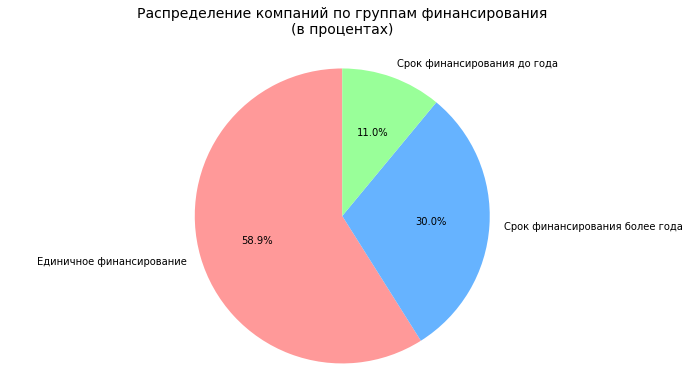

In [31]:
# Круговая диаграмма
plt.figure(figsize=(12, 6))

# Убираем 'Нет информации' для чистой визуализации
clean_groups = group_stats[group_stats.index != 'Нет информации']

plt.pie(clean_groups.values, 
        labels=clean_groups.index, 
        autopct='%1.1f%%',
        colors = ['#ff9999', '#66b3ff', '#99ff99'],
        startangle=90)

plt.title('Распределение компаний по группам финансирования\n(в процентах)', fontsize=14, pad=20)
plt.axis('equal')
plt.show()

Посчитаем долю общего объема инвестиций для каждой группы:

In [32]:
# Общий объем инвестиций во всех компаниях
total_funding_all = investments_df['funding_total_usd'].sum()

print(f"Общий объем инвестиций во всех компаниях: {total_funding_all}")

Общий объем инвестиций во всех компаниях: 650933703144.0


In [33]:
# Сумма инвестиций по группам
funding_by_group = investments_df.groupby('funding_group')['funding_total_usd'].agg(['sum', 'count'])
display(funding_by_group)

,sum,count
funding_group,,
Единичное финансирование,1.993044e+11,24113
Нет информации,3.430000e+07,2
Срок финансирования более года,4.027090e+11,12291
Срок финансирования до года,4.888598e+10,4501


Text(0.5, 1.0, 'Доля общего объема инвестиций\nпо группам финансирования')

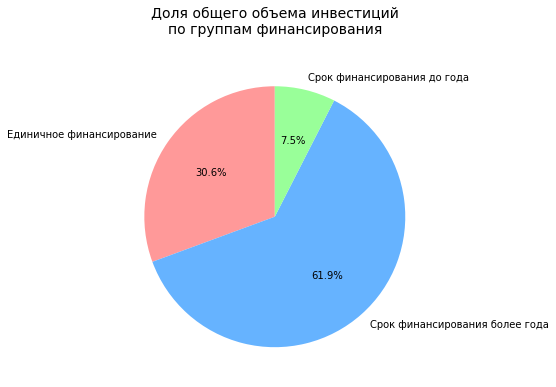

In [34]:
# Подготовка данных для визуализации
groups_for_viz = funding_by_group[funding_by_group.index != 'Нет информации']

plt.figure(figsize=(12, 6))


# Круговая диаграмма долей инвестиций
plt.pie(groups_for_viz['sum'], 
        autopct='%1.1f%%',
        labels=clean_groups.index,
        colors = ['#ff9999', '#66b3ff', '#99ff99'],
        startangle=90,
        textprops={'fontsize': 10})
plt.title('Доля общего объема инвестиций\nпо группам финансирования', fontsize=14, pad=20)

Из полученных данных видно, что процент компаний с единичным финансированием составляет практически 59% всех компаний. Компании со сроком финансирования более года - 30%, а со сроком финансирования до года - 11%.

Заметно, что доля от общего финансирования наибольшая у компаний со сроком финансирования более года (около 62%). Наименьшая у компаний со сроком финансирования до года - 7.5%. Единичное финансирование компаний составляет 30.6% от общего финансирования.

### 2.2 Выделение средних и нишевых сегментов рынка

In [35]:
segment_frequency = investments_df['market'].value_counts()

total_companies = len(investments_df)

for segment, count in segment_frequency.items():
    percentage = (count / total_companies) * 100
    print(f"{segment:.<20} {count:>5} компаний ({percentage:.1f}%)")

print(f"\nВсего компаний: {total_companies}")

software............  4812 компаний (11.8%)
biotechnology.......  3590 компаний (8.8%)
нет информации......  2503 компаний (6.1%)
mobile..............  2344 компаний (5.7%)
e-commerce..........  1866 компаний (4.6%)
curated web.........  1693 компаний (4.1%)
enterprise software.  1381 компаний (3.4%)
health care.........  1185 компаний (2.9%)
clean technology....  1180 компаний (2.9%)
games...............  1117 компаний (2.7%)
advertising.........  1107 компаний (2.7%)
hardware + software.  1062 компаний (2.6%)
social media........  1003 компаний (2.5%)
health and wellness.   873 компаний (2.1%)
education...........   844 компаний (2.1%)
finance.............   828 компаний (2.0%)
analytics...........   667 компаний (1.6%)
manufacturing.......   596 компаний (1.5%)
security............   567 компаний (1.4%)
semiconductors......   484 компаний (1.2%)
web hosting.........   424 компаний (1.0%)
consulting..........   349 компаний (0.9%)
hospitality.........   336 компаний (0.8%)
travel....

In [36]:
# Рассчитываем частоту встречаемости каждого сегмента рынка
market_segments = investments_df['market'].value_counts()

# Классификация сегментов
mass_markets = market_segments[market_segments > 120]
medium_markets = market_segments[(market_segments >= 35) & (market_segments <= 120)]
niche_markets = market_segments[market_segments < 35]

print(f"Массовые сегменты (>120 компаний): {len(mass_markets)}")
print(f"Средние сегменты (35-120 компаний): {len(medium_markets)}")
print(f"Нишевые сегменты (<35 компаний): {len(niche_markets)}")
print(f"Всего уникальных сегментов: {len(market_segments)}")

Массовые сегменты (>120 компаний): 49
Средние сегменты (35-120 компаний): 57
Нишевые сегменты (<35 компаний): 334
Всего уникальных сегментов: 440


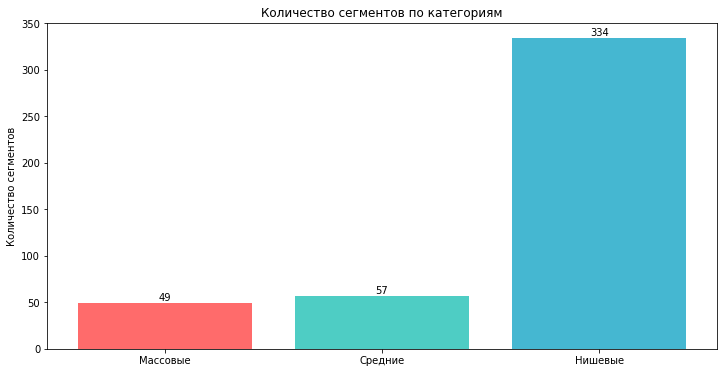

In [37]:
# Распределение сегментов по категориям
category_counts = [len(mass_markets), len(medium_markets), len(niche_markets)]
categories = ['Массовые', 'Средние', 'Нишевые']
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']

plt.figure(figsize=(12, 6))

plt.bar(categories, 
        category_counts, 
        color=colors)
plt.title('Количество сегментов по категориям')
plt.ylabel('Количество сегментов')

# Добавляем значения на столбцы
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

Text(0.5, 1.0, 'Доля компаний по категориям сегментов')

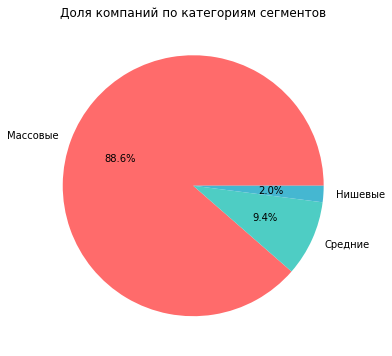

In [38]:
plt.figure(figsize=(12, 6))

company_counts = [mass_markets.sum(), medium_markets.sum(), niche_markets.sum()]
plt.pie(company_counts, 
        labels=categories, 
        autopct='%1.1f%%', 
        colors=colors)
plt.title('Доля компаний по категориям сегментов')

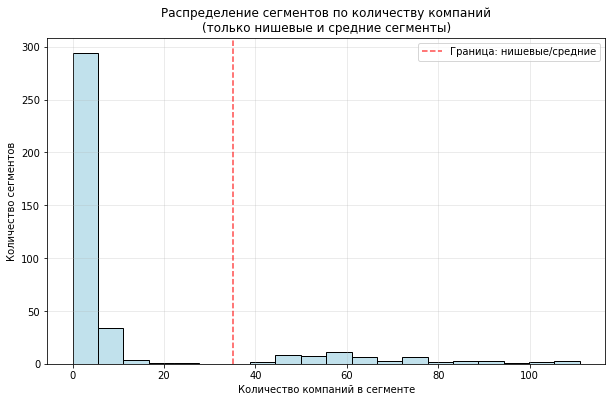

In [39]:
plt.figure(figsize=(10, 6))

# Фильтруем данные - только нишевые и средние сегменты (до 120 компаний)
filtered_data = market_segments[market_segments <= 120].values

sns.histplot(data=filtered_data, 
             bins=20, 
             color='lightblue')
plt.xlabel('Количество компаний в сегменте')
plt.ylabel('Количество сегментов')
plt.title('Распределение сегментов по количеству компаний\n(только нишевые и средние сегменты)')
plt.grid(True, alpha=0.3)

# Добавим вертикальную линию для наглядности разделения
plt.axvline(35, color='red', linestyle='--', alpha=0.7, label='Граница: нишевые/средние')
plt.legend()

plt.show()

Оставим в столбце `market` только массовые сегменты. Для остальных сегментов заменим значения на заглушки — `niche` для нишевых и `mid` для средних.

In [40]:
investments_df['market'] = investments_df['market'].astype(str)

# Создаем копию столбца для работы
market_series = investments_df['market'].copy()

# Для каждого значения проверяем к какой категории оно относится
for i, segment in enumerate(market_series):
    if segment in mass_markets:
        # Оставляем как есть - массовый сегмент
        continue
    elif segment in medium_markets:
        # Заменяем на 'mid'
        market_series.iloc[i] = 'mid'
    else:
        # Заменяем на 'niche'
        market_series.iloc[i] = 'niche'

# Возвращаем обратно в датафрейм
investments_df['market'] = market_series

investments_df['market'] = investments_df['market'].astype('category')

Проверим корректность выполненных действий:

In [41]:
print(investments_df['market'].sort_values().unique())

print(investments_df['market'].value_counts())

['advertising', 'analytics', 'apps', 'automotive', 'big data', ..., 'technology', 'travel', 'video', 'web hosting', 'нет информации']
Length: 51
Categories (51, object): ['advertising', 'analytics', 'apps', 'automotive', ..., 'travel', 'video', 'web hosting', 'нет информации']
software                4812
mid                     3841
biotechnology           3590
нет информации          2503
mobile                  2344
e-commerce              1866
curated web             1693
enterprise software     1381
health care             1185
clean technology        1180
games                   1117
advertising             1107
hardware + software     1062
social media            1003
health and wellness      873
education                844
niche                    830
finance                  828
analytics                667
manufacturing            596
security                 567
semiconductors           484
web hosting              424
consulting               349
hospitality              3

In [42]:
segment_frequency_new = investments_df['market'].value_counts()

for segment, count in segment_frequency_new.items():
    percentage = (count / total_companies) * 100
    print(f"{segment:.<20} {count:>5} компаний ({percentage:.1f}%)")

print(f"\nВсего компаний: {total_companies}")

software............  4812 компаний (11.8%)
mid.................  3841 компаний (9.4%)
biotechnology.......  3590 компаний (8.8%)
нет информации......  2503 компаний (6.1%)
mobile..............  2344 компаний (5.7%)
e-commerce..........  1866 компаний (4.6%)
curated web.........  1693 компаний (4.1%)
enterprise software.  1381 компаний (3.4%)
health care.........  1185 компаний (2.9%)
clean technology....  1180 компаний (2.9%)
games...............  1117 компаний (2.7%)
advertising.........  1107 компаний (2.7%)
hardware + software.  1062 компаний (2.6%)
social media........  1003 компаний (2.5%)
health and wellness.   873 компаний (2.1%)
education...........   844 компаний (2.1%)
niche...............   830 компаний (2.0%)
finance.............   828 компаний (2.0%)
analytics...........   667 компаний (1.6%)
manufacturing.......   596 компаний (1.5%)
security............   567 компаний (1.4%)
semiconductors......   484 компаний (1.2%)
web hosting.........   424 компаний (1.0%)
consulting

После выполненных действий мы получили записи о сегментах, где выделили массовые сегменты. Добавили заглушку для нишевых `niche` и средних `mid` сегментов. Было определено, что количество компаний в нишевом сегменте - 830 (2%) и количество компаний в среднем сегменте - 3841 (9.4%). Компаний в массовом сегменте 88.6% от общего количества компаний.

## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

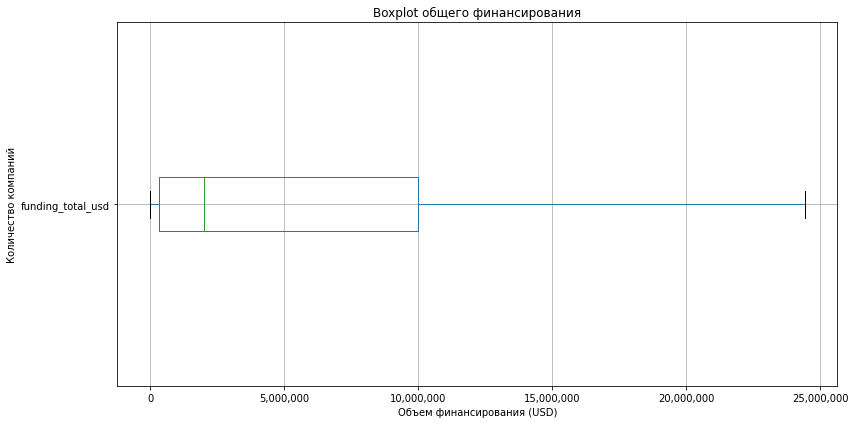

In [43]:
plt.figure(figsize=(12, 6))

# Boxplot для выявления выбросов

boxplot = investments_df.boxplot(column='funding_total_usd',
                                 vert=False,
                                 showfliers=False)

plt.title('Boxplot общего финансирования')
plt.xlabel('Объем финансирования (USD)')
plt.ylabel('Количество компаний')


# Отключаем научную нотацию и форматируем числа
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='x')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [44]:
# Рассчитаем точные значения типичного интервала
Q1 = investments_df['funding_total_usd'].quantile(0.25)
Q3 = investments_df['funding_total_usd'].quantile(0.75)

print(f"ТИПИЧНЫЙ ИНТЕРВАЛ ФИНАНСИРОВАНИЯ:")
print(f"От ${Q1:,.0f} до ${Q3:,.0f}")

ТИПИЧНЫЙ ИНТЕРВАЛ ФИНАНСИРОВАНИЯ:
От $350,000 до $10,000,000


Определим компании с аномальным объёмом общего финансирования.

In [45]:
# Группируем по сегментам и применяем IQR к каждой группе
def mark_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (group < lower) | (group > upper)

# Применяем ко всем группам сразу
investments_df['is_funding_outlier'] = investments_df.groupby('market')['funding_total_usd'].transform(mark_outliers)

In [46]:
investments_df['is_funding_outlier'].head(20)

0      True
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
11    False
12    False
14     True
16    False
17     True
18    False
20     True
21    False
22    False
Name: is_funding_outlier, dtype: bool

In [47]:
# Считаем долю аномалий по сегментам
outlier_stats = investments_df.groupby('market')['is_funding_outlier'].mean() 

outlier_sorted = outlier_stats.sort_values(ascending=False).round(4) # сортируем по убыванию

print('Топ-15 сегментов рынка с наибольшей долей компаний, получивших аномальное финансирование:')
for segment, ratio in outlier_sorted.head(15).items():
    print(f"{segment}: {ratio:.1%}")

Топ-15 сегментов рынка с наибольшей долей компаний, получивших аномальное финансирование:
real estate: 17.2%
entertainment: 16.7%
consulting: 16.6%
search: 16.5%
cloud computing: 16.4%
photography: 16.2%
saas: 16.2%
technology: 16.0%
video: 16.0%
niche: 15.9%
travel: 15.4%
networking: 15.4%
internet: 15.3%
big data: 15.3%
marketplaces: 15.3%


### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

In [48]:
# Проверяем данные за 2014 год
companies_2014 = investments_df[investments_df['founded_year'] == 2014]

print("ДАННЫЕ ЗА 2014 ГОД:")
print(f"Всего данных о компаниях за 2014 год: {len(companies_2014)}")
print(f"Из них с финансированием: {companies_2014['funding_total_usd'].notna().sum()}")
print(f"С датами финансирования: {companies_2014['first_funding_at'].notna().sum()}")

ДАННЫЕ ЗА 2014 ГОД:
Всего данных о компаниях за 2014 год: 1015
Из них с финансированием: 1015
С датами финансирования: 1015


In [49]:
monthly_2014 = companies_2014['founded_month'].value_counts().sort_index()
print("Компании по месяцам 2014:")
print(monthly_2014)

Компании по месяцам 2014:
2014-01    414
2014-02    110
2014-03    115
2014-04     98
2014-05     81
2014-06     73
2014-07     46
2014-08     31
2014-09     26
2014-10     16
2014-11      3
2014-12      2
Name: founded_month, dtype: int64


Можем заметить, что данных о компаниях за 2014 год `1015 шт.` и обо всех есть данные о финансировании и датой первого финансирования. Также есть компании за все 12 месяцев 2014-го года.

Исключаем компании с аномальным финансированием:

In [50]:
# Сохраняем размер до очистки
before_size = len(investments_df)

# Исключаем компании с аномальным финансированием
investments_clean = investments_df[~investments_df['is_funding_outlier']].copy()

# Считаем сколько удалили
removed_count = before_size - len(investments_clean)
removed_percentage = (removed_count / before_size) * 100

print(f"Было компаний: {before_size}")
print(f"Удалено аномальных: {removed_count}")
print(f"Осталось компаний: {len(investments_clean)}")
print(f"Удалено: {removed_percentage:.1f}% данных")

Было компаний: 40907
Удалено аномальных: 5244
Осталось компаний: 35663
Удалено: 12.8% данных


На основе столбцов `mid_funding_at` и `funding_rounds` оставим в датасете данные только о компаниях, которые получали финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [51]:
# Извлекаем год из mid_funding_at
investments_clean['funding_year'] = investments_clean['mid_funding_at'].dt.year

# Считаем количество раундов по годам
rounds_per_year = investments_clean['funding_year'].value_counts()

print("РАУНДЫ ФИНАНСИРОВАНИЯ ПО ГОДАМ:")
print("=" * 35)
for year, rounds in rounds_per_year.sort_index().items():
    print(f"{year}: {rounds} раундов")

# Находим годы с 50+ раундами
active_years = rounds_per_year[rounds_per_year >= 50].index

print(f"\nГоды с 50+ раундами: {sorted(active_years)}")

РАУНДЫ ФИНАНСИРОВАНИЯ ПО ГОДАМ:
1921.0: 1 раундов
1960.0: 2 раундов
1979.0: 1 раундов
1982.0: 3 раундов
1983.0: 1 раундов
1984.0: 2 раундов
1985.0: 3 раундов
1987.0: 2 раундов
1989.0: 1 раундов
1990.0: 1 раундов
1992.0: 4 раундов
1993.0: 1 раундов
1994.0: 4 раундов
1995.0: 4 раундов
1996.0: 3 раундов
1997.0: 4 раундов
1998.0: 9 раундов
1999.0: 28 раундов
2000.0: 65 раундов
2001.0: 37 раундов
2002.0: 48 раундов
2003.0: 63 раундов
2004.0: 96 раундов
2005.0: 697 раундов
2006.0: 1165 раундов
2007.0: 1600 раундов
2008.0: 1984 раундов
2009.0: 2618 раундов
2010.0: 3467 раундов
2011.0: 4311 раундов
2012.0: 5533 раундов
2013.0: 7821 раундов
2014.0: 6083 раундов

Годы с 50+ раундами: [2000.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0]


Фильтруем компании:

In [52]:
# Сохраняем размер до фильтрации
before_filter = len(investments_clean)

# Оставляем только компании с финансированием в активные годы
investments_filtered = investments_clean[investments_clean['funding_year'].isin(active_years)].copy()

# Считаем сколько осталось
after_filter = len(investments_filtered)
removed_count = before_filter - after_filter

print(f"\nРезультаты по активным годам (раундов 50+):")
print(f"Было компаний: {before_filter}")
print(f"Осталось после фильтрации: {after_filter}")
print(f"Удалено: {removed_count} компаний")


Результаты по активным годам (раундов 50+):
Было компаний: 35663
Осталось после фильтрации: 35503
Удалено: 160 компаний


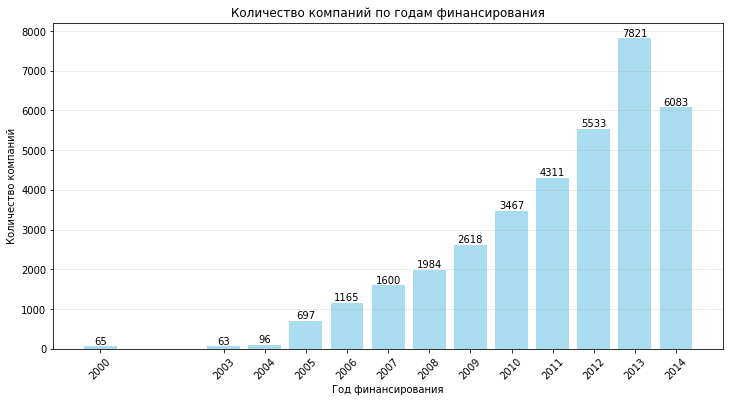

In [53]:
# Столбчатая диаграмма
plt.figure(figsize=(12, 6))

yearly_stats = investments_filtered['funding_year'].value_counts().sort_index()

plt.bar(yearly_stats.index, #x
        yearly_stats.values, #y
        color='skyblue', 
        alpha=0.7)
plt.title('Количество компаний по годам финансирования')
plt.xlabel('Год финансирования')
plt.ylabel('Количество компаний')
plt.xticks(yearly_stats.index, rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for year, count in yearly_stats.items():
    plt.text(year, count + 5, str(count), ha='center', va='bottom')

Обратим внимание на то, что в 2013 году количество компаний, получивших финансирование является наибольшим, за рассматриваемый период.

### 3.3. Анализ типов финансирования по объёму и популярности


In [54]:
# Список столбцов с типами финансирования
funding_types = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                 'convertible_note', 'debt_financing', 'angel', 'grant', 
                 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
                 'secondary_market', 'product_crowdfunding']

# Суммируем финансирование по типам
funding_totals = investments_filtered[funding_types].sum().sort_values(ascending=False)

for fund_type, total in funding_totals.items():
    print(f"{fund_type:.<30} {total:>15,.0f} $")

venture....................... 128,567,748,349 $
seed..........................   9,418,199,028 $
debt_financing................   8,157,013,846 $
private_equity................   4,835,608,504 $
angel.........................   2,477,263,836 $
undisclosed...................   2,021,431,737 $
grant.........................   1,978,748,688 $
post_ipo_equity...............   1,946,152,068 $
convertible_note..............     564,539,436 $
post_ipo_debt.................     286,718,349 $
equity_crowdfunding...........     237,960,645 $
product_crowdfunding..........     186,093,920 $
secondary_market..............      45,285,796 $


In [55]:
# Словарь для наименований на русском языке
russian_labels = {
    'seed': 'Посевные инвестиции',
    'venture': 'Венчурные инвестиции', 
    'debt_financing': 'Долговое финансирование',
    'angel': 'Инвестиции бизнес-ангелов',
    'grant': 'Гранты',
    'private_equity': 'Прямые инвестиции',
    'undisclosed': 'Нераскрытое финансирование',
    'post_ipo_equity': 'Финансирование после IPO',
    'post_ipo_debt': 'Долговое финансирование после IPO',
    'secondary_market': 'Сделки на вторичном рынке',
    'product_crowdfunding': 'Продуктовый краудфандинг',
    'equity_crowdfunding': 'Долевой краудфандинг',
    'convertible_note': 'Конвертируемые займы'
}

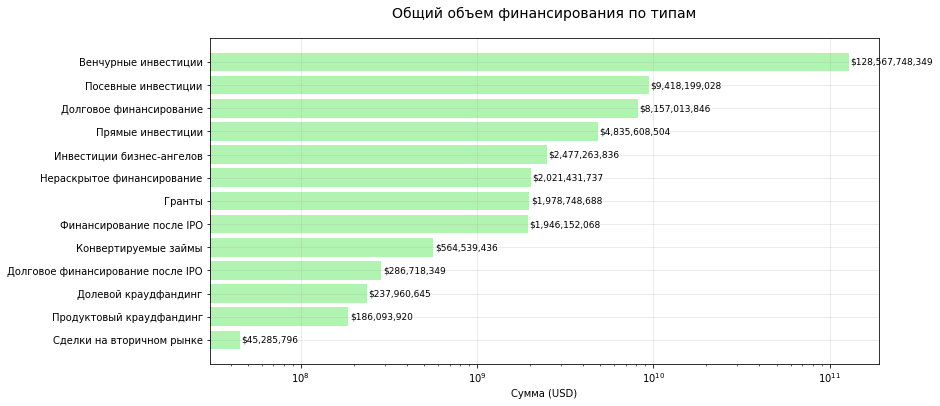

In [56]:
# Столбчатая диаграмма
plt.figure(figsize=(12, 6))

russian_names = [russian_labels.get(fund_type, fund_type) for fund_type in funding_totals.index]

bars = plt.barh(russian_names, 
                funding_totals.values, 
                color='lightgreen', 
                alpha=0.7)
plt.title('Общий объем финансирования по типам', fontsize=14, pad=20)
plt.xlabel('Сумма (USD)')
plt.xscale('log')  # логарифмическая шкала по X
plt.grid(axis='x', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи значений справа от столбцов
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.02, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', va='center', fontsize=9)

# Переворачиваем ось Y, чтобы максимальное значение было сверху
plt.gca().invert_yaxis()

Построим график, который покажет популярность разных типов финансирования:

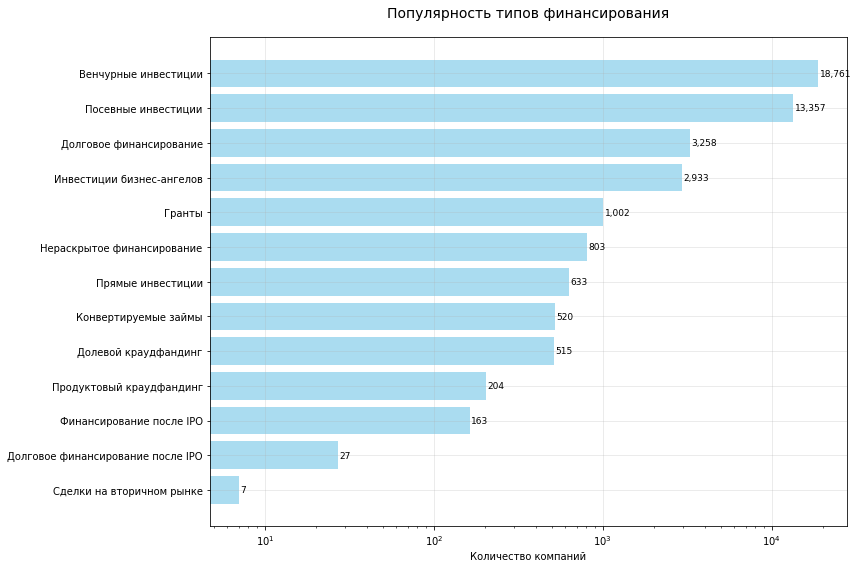

In [57]:
# Считаем количество ненулевых значений для каждого типа финансирования
funding_counts = investments_filtered[funding_types].astype(bool).sum().sort_values(ascending=True)

# Строим график популярности
plt.figure(figsize=(12, 8))

russian_names = [russian_labels.get(fund_type, fund_type) for fund_type in funding_counts.index]

bars = plt.barh(russian_names, 
                funding_counts.values, 
                color='skyblue', 
                alpha=0.7)

plt.title('Популярность типов финансирования', fontsize=14, pad=20)
plt.xlabel('Количество компаний')
plt.xscale('log')  # логарифмическая шкала по X
plt.grid(axis='x', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи значений справа от столбцов
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.02, bar.get_y() + bar.get_height()/2, 
             f'{width:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Можно обратить внимание редко используемые типы с большими объёмами: `Прямые инвестиции` 7-е место по популярности и 4-е место по финансированию. `Долговое финансирование после IPO` среди менее популярных имеет относительно высокий объём финансирования.
Также часто используемые типы с небольшими объёмами: `Посевные инвестиции` в сравнении с `Долговое финансирование` (количество компаний 13357 и 3258 соответственно) имеют относительно небольшую разницу в общем финансировании.

Построим график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

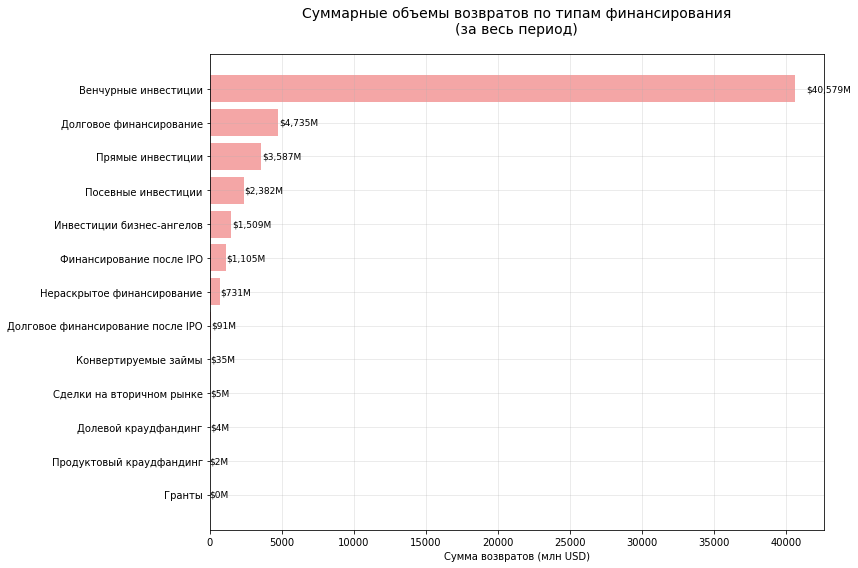

In [58]:
# Суммируем возвраты по всем годам для каждого типа финансирования
returns_total = returns_df[funding_types].sum().sort_values(ascending=True)

# Строим график суммарных объемов возвратов
plt.figure(figsize=(12, 8))

russian_names = [russian_labels.get(fund_type, fund_type) for fund_type in returns_total.index]

bars = plt.barh(russian_names, 
                returns_total.values, 
                color='lightcoral', 
                alpha=0.7)

plt.title('Суммарные объемы возвратов по типам финансирования\n(за весь период)', 
          fontsize=14, pad=20)
plt.xlabel('Сумма возвратов (млн USD)')
plt.grid(axis='x', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи значений справа от столбцов
for bar in bars:
    width = bar.get_width()
    plt.text(width * 1.02, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}M', va='center', fontsize=9)

plt.tight_layout()
plt.show()

* Топ-3 типа финансирования по общему объему: `Венчурные инвестиции`, `Посевные инвестиции`, `Долговое финансирование`;
* Топ-3 популярных типов финансирования: `Венчурные инвестиции`, `Посевные инвестиции`, `Долговое финансирование` что полностью совпадает с топом типов по общему финансированию;
* Топ-3 типа финансирования по суммарным объемам возвратов: `Венчурные инвестиции`, `Долговое финансирование`, `Прямые инвестиции`;

## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

In [59]:
# Рассчитываем средний объем одного раунда финансирования для каждой компании
investments_filtered['avg_round_usd'] = investments_filtered['funding_total_usd'] / investments_filtered['funding_rounds']

# Проверяем результат
print("Статистика среднего объема раунда финансирования:")
print(f"Медиана: ${investments_filtered['avg_round_usd'].median():,.0f}")
print(f"Среднее: ${investments_filtered['avg_round_usd'].mean():,.0f}")
print(f"Минимум: ${investments_filtered['avg_round_usd'].min():,.0f}")
print(f"Максимум: ${investments_filtered['avg_round_usd'].max():,.0f}")

Статистика среднего объема раунда финансирования:
Медиана: $1,000,000
Среднее: $2,784,375
Минимум: $1
Максимум: $70,000,000


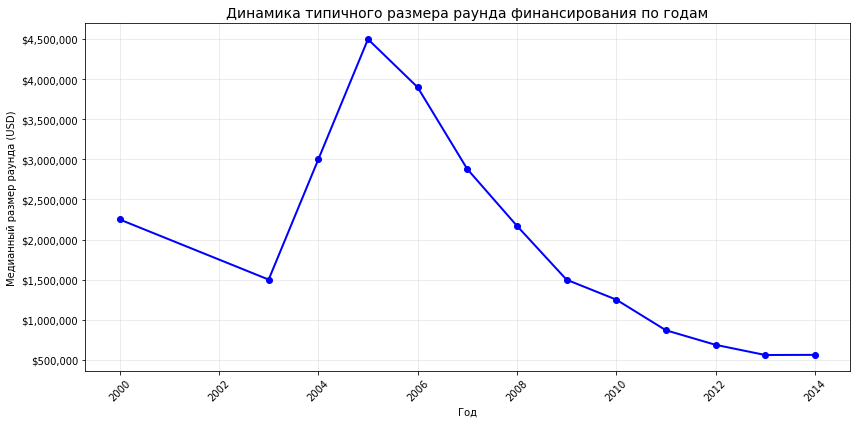

In [60]:
yearly_avg_round = investments_filtered.groupby('funding_year')['avg_round_usd'].median()

# Преобразуем в простые массивы
years = np.array(yearly_avg_round.index)
values = np.array(yearly_avg_round.values)

# Линейный график для динамики
plt.figure(figsize=(12, 6))
plt.plot(years, values, marker='o', linewidth=2, color='blue')

plt.title('Динамика типичного размера раунда финансирования по годам', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Медианный размер раунда (USD)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Форматируем ось Y в доллары с разделителями тысяч
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))


plt.tight_layout()
plt.show()


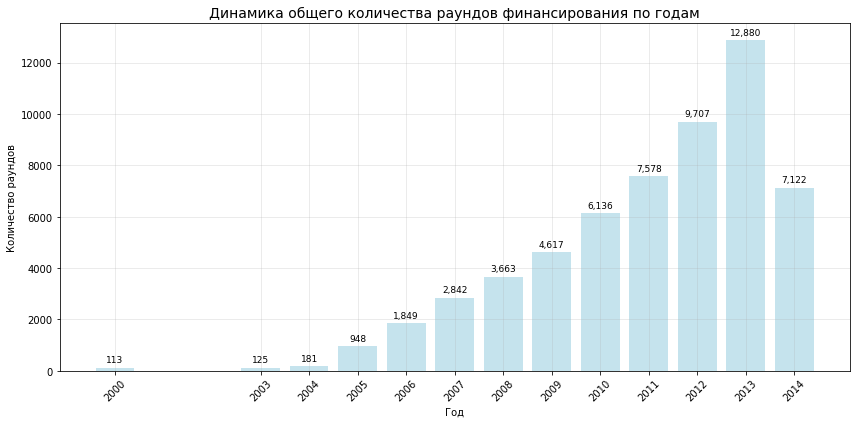

In [61]:
# Динамика общего количества раундов по годам
rounds_per_year = investments_filtered.groupby('funding_year')['funding_rounds'].sum()

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(rounds_per_year.index, 
        rounds_per_year.values, 
        alpha=0.7, 
        color='lightblue')
plt.title('Динамика общего количества раундов финансирования по годам', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Количество раундов')
plt.grid(True, alpha=0.3)
plt.xticks(rounds_per_year.index, rotation=45)

# Добавляем подписи значений на столбцы
for i, count in enumerate(rounds_per_year):
    plt.text(years[i], count + max(rounds_per_year)*0.01, f'{count:,}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Можно заметить, что в 2005 году был наибольший типичный размер средств, собранных в рамках одного раунда.

После 2005 года типичный размер средств, собранный в рамках одного раунда, снижался ежегодно и к 2014-му году достиг минимума. Однако количество раундов увеличивалось, достигнув своего максимума в 2013-м году (12880 шт.) и резко уменьшилось в 2014-м (7122 шт.)

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов


In [63]:
# Отбираем только 2013 и 2014 годы
pivot_2013_2014 = pivot_table[[2013, 2014]].copy()

# Добавляем столбец с ростом финансирования в процентах
pivot_2013_2014['growth_2013_2014'] = (
    (pivot_2013_2014[2014] - pivot_2013_2014[2013]) / pivot_2013_2014[2013] * 100
)

# Отбираем сегменты с ростом в 2014 году по сравнению с 2013
growing_markets = pivot_2013_2014[pivot_2013_2014['growth_2013_2014'] > 0]

# Сортируем по проценту роста
growing_markets_sorted = growing_markets.sort_values('growth_2013_2014', ascending=False)

display(growing_markets_sorted)

funding_year,2013.0,2014.0,growth_2013_2014
market,,,
niche,269904287,738172920,173.494329
medical,64469424,175236064,171.812672
нет информации,259004551,609069074,135.157673
startups,18080552,41501837,129.538551
apps,28868621,66237730,129.445424
internet,69732096,117830756,68.976358
technology,120873887,202018937,67.131994
real estate,92207655,115567364,25.333807
saas,79576613,92807752,16.626919


In [64]:
# Отбираем только массовые сегменты (исключаем mid и niche)
mass_markets = [market for market in growing_markets_sorted.index 
                if 'mid' not in market 
                and 'niche' not in market 
                and 'нет информации' not in market]

growing_mass_markets = growing_markets_sorted.loc[mass_markets]

display(growing_mass_markets)

funding_year,2013.0,2014.0,growth_2013_2014
market,,,
medical,64469424,175236064,171.812672
startups,18080552,41501837,129.538551
apps,28868621,66237730,129.445424
internet,69732096,117830756,68.976358
technology,120873887,202018937,67.131994
real estate,92207655,115567364,25.333807
saas,79576613,92807752,16.626919
design,60958835,68988516,13.172301
manufacturing,393936634,416332314,5.685097


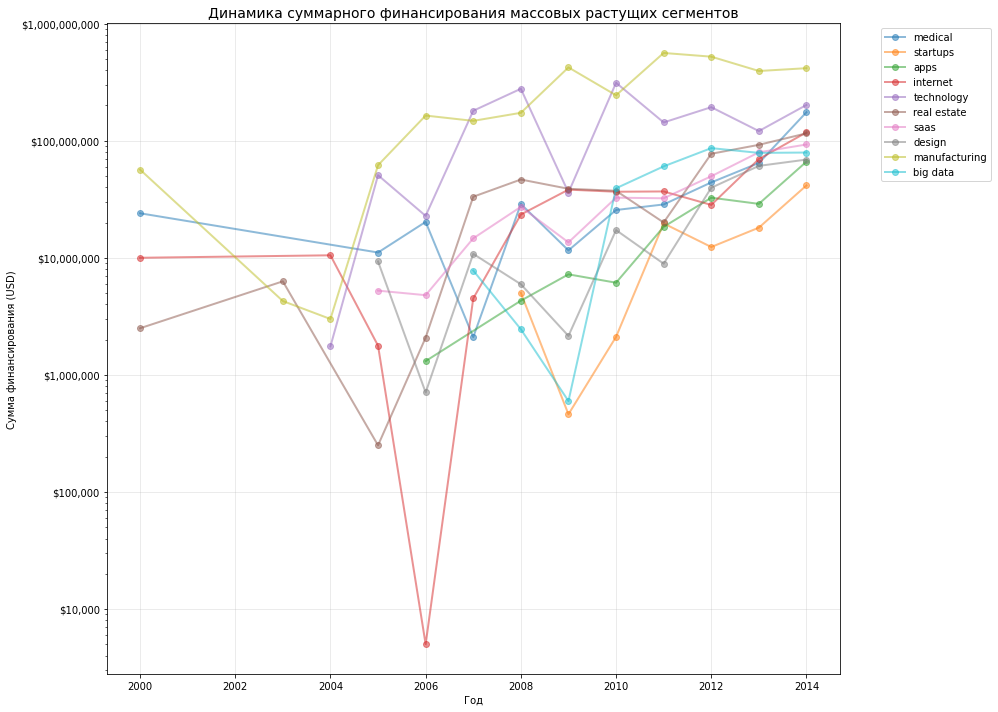

In [65]:
# Визуализация динамики массовых растущих сегментов
plt.figure(figsize=(14, 10))

# Для каждого массового растущего сегмента строим линию тренда
for market in growing_mass_markets.index:
    # Берем данные по всем годам для этого сегмента
    market_data = pivot_table.loc[market]
    # Убираем нулевые годы (где нет данных)
    valid_years = market_data[market_data > 0]
    plt.plot(valid_years.index, valid_years.values, marker='o', linewidth=2, label=market, alpha=0.5)

plt.title('Динамика суммарного финансирования массовых растущих сегментов', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Сумма финансирования (USD)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

Наиболее быстрорастущие и уверенные сегменты:

`Big Data` - демонстрирует рост с 2010 года, особенно резкий скачок в 2009-2010 годах. 

`SaaS (Software as a Service)` - показывает стабильный уверенный рост на протяжении всего периода, с заметным ускорением после 2011 года.

`Medical` - имеет устойчивый рост с 2009 года, с особенно сильным ростом в последние годы.

`Apps` - уверенно растут с 2006 года.

Наибольший инвестиционный интерес смещается в сторону **технологических** сегментов.

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

In [66]:
# Суммируем финансирование по годам и типам
funding_by_year_type = investments_filtered.groupby('funding_year')[funding_types].sum()

# Суммируем возвраты по годам и типам
returns_by_year_type = returns_df.groupby('year')[funding_types].sum()

# Находим общие годы между двумя наборами данных
common_years = funding_by_year_type.index.intersection(returns_by_year_type.index)
print(f"Общие годы с данными: {sorted(common_years)}")

# 4. Фильтруем данные только по общим годам
funding_common = funding_by_year_type.loc[common_years]
returns_common = returns_by_year_type.loc[common_years]

# 5. Рассчитываем долю возврата для каждого года и типа финансирования
return_ratios = pd.DataFrame(index=common_years, columns=funding_types)

for fund_type in funding_types:
    for year in common_years:
        funding_amount = funding_common.loc[year, fund_type]
        return_amount = returns_common.loc[year, fund_type]
        
        # Рассчитываем долю возврата
        ratio = return_amount / (funding_amount + 1e-60)
        
        # Заменяем аномальные значения (>1000%) на NaN
        if ratio <= 10:  # 1000%
            return_ratios.loc[year, fund_type] = ratio
        else:
            return_ratios.loc[year, fund_type] = np.nan

Общие годы с данными: [2000.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0]


Построим график, на котором отобразим нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

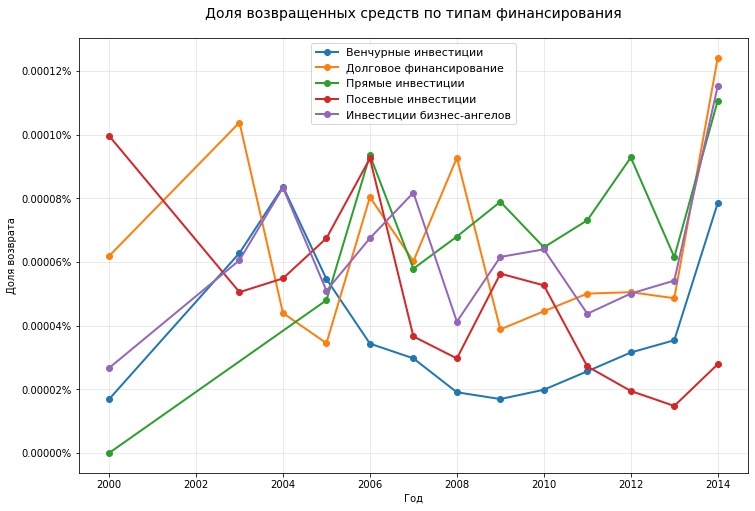

In [67]:
# Выбираем нужные типы финансирования
selected_types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

# Создаем график
plt.figure(figsize=(12, 8))

for fund_type in selected_types:
    # Берем данные по выбранному типу финансирования
    ratios = return_ratios[fund_type]
    
    # Убираем пропуски
    valid_data = ratios.dropna()
    
    if len(valid_data) > 0:
        # Строим график
        plt.plot(valid_data.index, valid_data.values, 
                marker='o', linewidth=2, markersize=6,
                label=russian_labels.get(fund_type, fund_type))

plt.title('Доля возвращенных средств по типам финансирования', fontsize=14, pad=20)
plt.xlabel('Год')
plt.ylabel('Доля возврата')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Форматируем ось Y в проценты
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # 1.0 = 100%

- `Долговое финансирование` показывает стабильный восходящий тренд на протяжении всего периода с минимальными колебаниями особенно в период 2009-2014. 
- `Прямые инвестиции` также показывают относительно стабильную положительную динамику.
- `Венчурные инвестиции` показывают нестабильную динамику с резкими скачками и падениями, но с общей тенденцией к росту в последние годы.


## Шаг 5. Итоговый вывод и рекомендации

На основе анализа динамики финансирования рекомендуется сфокусироваться на следующих технологических сегментах, демонстрирующих наиболее уверенный рост:

* Наибольший инвестиционный интерес смещается в сторону технологических сегментов: `Big Data`, `SaaS`, `Medical`, `Apps`.
* Наимболее уместный тип финансирования `Долговое финансирование`, т.к. показывает стабильный восходящий тренд доли возвращенных средств и один из самых популярных типов финансирования. Можно рассмотреть `Венчурные инвестиции` - это самый популярный тип финансирования с самым большим суммарным объёмом возвратных средств.

---
* Была проведена предобработка данных, обработаны полные дубликаты и пропуски в нужных столбцах;
* Все компании были разделены на три группы: `Единичное финансирование`, `Срок финансирования до года`, `Срок финансирования более года.`;
* Были выделены средних и нишевых сегменты рынка;
* Оценено, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся;
* Определены сегменты рынка с наибольшей долей компаний;
* Определены общие объемы финансирования по типам финансирования, популярность типов финансирования и суммарные объемы возвратов по типам финансирования;
* Были рассчитаны для каждой компании средний объём одного раунда финансирования;
* Создана сводная таблица, в которой указывается суммарный размер общего финансирования по годам и сегментам рынка. Отобраны только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013;
* Рассчитаны нормированные значения возврата средств.
  
---

* Процент компаний с единичным финансированием составляет практически 59% всех компаний. Компании со сроком финансирования более года - 30%, а со сроком финансирования до года - 11%. Доля от общего финансирования наибольшая у компаний со сроком финансирования более года (около 62%). Наименьшая у компаний со сроком финансирования до года - 7.5%. Единичное финансирование компаний составляет 30.6% от общего финансирования;
* Массовые сегменты составляют 49 категорий;
* Средние сегменты составляют 57 категорий;
* Нишевые сегменты составляют 334 категории;
* Количество компаний в нишевом сегменте - 830 (2%) и количество компаний в среднем сегменте - 3841 (9.4%). Компаний в массовом сегменте 88.6% от общего количества компаний.
* Типичный интервал финансирвания: От `$350.000` до `$10,000.000`
* Топ-15 сегментов рынка с наибольшей долей компаний, получивших аномальное финансирование:
    * `real estate`: 17.2%
    * `entertainment`: 16.7%
    * `consulting`: 16.6%
    * `search`: 16.5%
    * `cloud computing`: 16.4%
    * `photography`: 16.2%
    * `saas`: 16.2%
    * `technology`: 16.0%
    * `video`: 16.0%
    * `niche`: 15.9%
    * `travel`: 15.4%
    * `networking`: 15.4%
    * `internet`: 15.3%
    * `big data`: 15.3%
    * `marketplaces`: 15.3%
* В 2013 году количество компаний, получивших финансирование является наибольшим, за рассматриваемый период;
* Топ-3 типа финансирования по общему объему: `Венчурные инвестиции`, `Посевные инвестиции`, `Долговое финансирование`;
* Топ-3 популярных типов финансирования: `Венчурные инвестиции`, `Посевные инвестиции`, `Долговое финансирование` что полностью совпадает с топом типов по общему финансированию;
* Топ-3 типа финансирования по суммарным объемам возвратов: `Венчурные инвестиции`, `Долговое финансирование`, `Прямые инвестиции`;
* В 2005 году был наибольший типичный размер средств, собранных в рамках одного раунда;
* После 2005 года типичный размер средств, собранный в рамках одного раунда, снижался ежегодно и к 2014-му году достиг минимума. Однако количество раундов увеличивалось, достигнув своего максимума в 2013-м году (12880 шт.) и резко уменьшилось в 2014-м (7122 шт.)
* Наиболее быстрорастущие и уверенные сегменты:

    * `Big Data` - демонстрирует рост с 2010 года, особенно резкий скачок в 2009-2010 годах. 

    * `SaaS (Software as a Service)` - показывает стабильный уверенный рост на протяжении всего периода, с заметным ускорением после 2011 года.

    * `Medical` - имеет устойчивый рост с 2009 года, с особенно сильным ростом в последние годы.

    * `Apps` - уверенно растут с 2006 года.

* Наибольший инвестиционный интерес смещается в сторону **технологических** сегментов.
* `Долговое финансирование` показывает стабильный восходящий тренд на протяжении всего периода с минимальными колебаниями особенно в период 2009-2014. 
* `Прямые инвестиции` также показывают относительно стабильную положительную динамику.
* `Венчурные инвестиции` показывают нестабильную динамику с резкими скачками и падениями, но с общей тенденцией к росту в последние годы.

